<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [5]:
df['ConvertedComp'].isnull().sum()

816

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

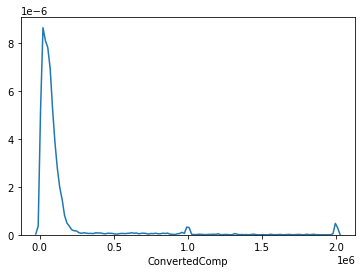

In [6]:
# your code goes here
sns.distplot (df['ConvertedComp'], hist = False)

Plot the histogram for the column `ConvertedComp`.


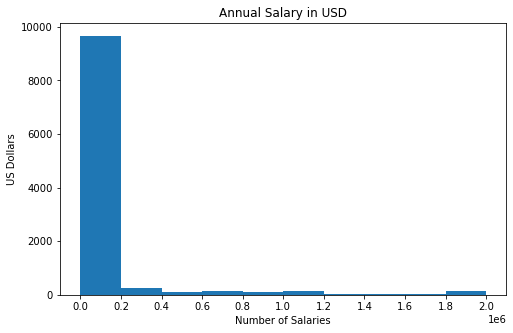

In [7]:
# your code goes here
count, bin_edges = np.histogram(df['ConvertedComp'].dropna())
df['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Annual Salary in USD')
plt.ylabel('US Dollars')
plt.xlabel('Number of Salaries')
plt.show()

What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
df['ConvertedComp'].median()

57745.0

In [9]:
df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
gmale=df.Gender.value_counts().Man
print(gmale, ' Responders identified themselves as Man')

10480  Responders identified themselves as Man


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
gfemale=df.loc[df['Gender'] == 'Woman', 'ConvertedComp'].median()
print("Woman Median: ", gfemale)

Woman Median:  57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [38]:
# your code goes here
agmin = df['Age'].min()
q1a = df['Age'].quantile(0.25)
agmed = df['Age'].median()
q3a = df['Age'].quantile(0.75)
agmx = df['Age'].max()
print('The lowest age is: ', agmin)
print('The first quarter is: ', q1a)
print('The median age is: ', agmed)
print('The third quarter is: ', q3a)
print('The oldest is: ', agmx)

The lowest age is:  16.0
The first quarter is:  25.0
The median age is:  29.0
The third quarter is:  35.0
The oldest is:  99.0


Plot a histogram of the column `Age`.


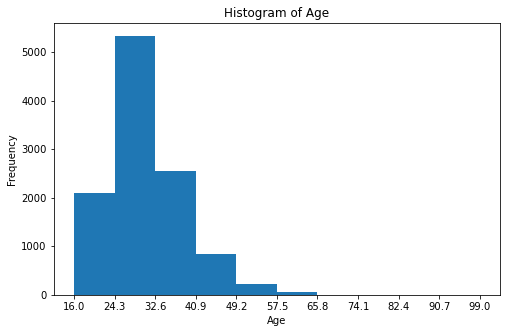

In [39]:
count, bin_edges = np.histogram(df['Age'].dropna())
df['Age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Age')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

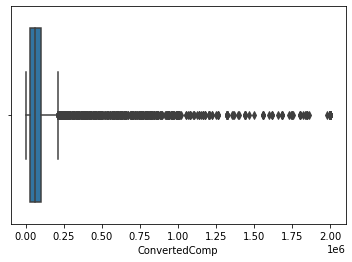

In [40]:
# your code goes her
sns.boxplot(x=df['ConvertedComp'])

<AxesSubplot:xlabel='Age'>

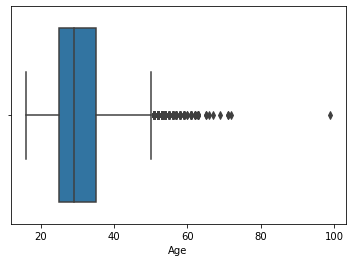

In [41]:
sns.boxplot(x=df['Age'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
# your code goes here
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1
iqr

73132.0

Find out the upper and lower bounds.


In [19]:
# your code goes here
upr=q3 + 1.5 * iqr
lwr=q1 - 1.5 * iqr
print('Upper bound is: ', upr)
print('Lower bound is: ', lwr)

Upper bound is:  209698.0
Lower bound is:  -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
# your code goes here
def find_outliers_IQR(df):
   Q1=df.quantile(0.25)
   Q3=df.quantile(0.75)
   IQR=Q3-Q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [21]:
outliers = find_outliers_IQR(df['ConvertedComp'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))


number of outliers: 879
max outlier value: 2000000.0
min outlier value: 209892.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [22]:
# your code goes here
def drop_outliers_IQRd(df):
   qd1=df.quantile(0.25)
   qd3=df.quantile(0.75)
   IQRd=qd3-qd1
   not_outliers = df[~((df<(qd1-1.5*IQRd)) | (df>(qd3+1.5*IQRd)))]
   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped

In [24]:
outliers_dropped = drop_outliers_IQRd(df['ConvertedComp'])

In [25]:
outliers_dropped.mean()

index              5706.242321
ConvertedComp    923219.389078
dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [52]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
